In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
          "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
          "root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
          "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
          "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
          "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
          "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
          "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
          "dst_host_srv_rerror_rate","label"]

In [5]:
df = pd.read_csv("C:/Users/timsh/Downloads/kddcup.data/kddcup.data.corrected",sep=",",
                names=columns,index_col=None)

In [6]:
df.shape

(4898431, 42)

In [7]:
df=df[df["service"]=="http"]
df=df.drop("service",axis=1)
columns.remove("service")

In [8]:
df.shape

(623091, 41)

In [9]:
df["label"].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

In [10]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

In [12]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [13]:
for f in range(0,3):
    df=df.iloc[np.random.permutation(len(df))]
    
df2 = df[:500000]
labels = df2["label"]
df_validate = df[500000:]

x_train,x_test,y_train,y_test = train_test_split(df2,labels,test_size=0.2,random_state=42)

x_val,y_val = df_validate,df_validate["label"]

# Isolation Forest

In [ ]:
isolation_forest = IsolationForest(n_estimators=100,max_samples=256,contamination=0.1,random_state=42)
isolation_forest.fit(x_train)

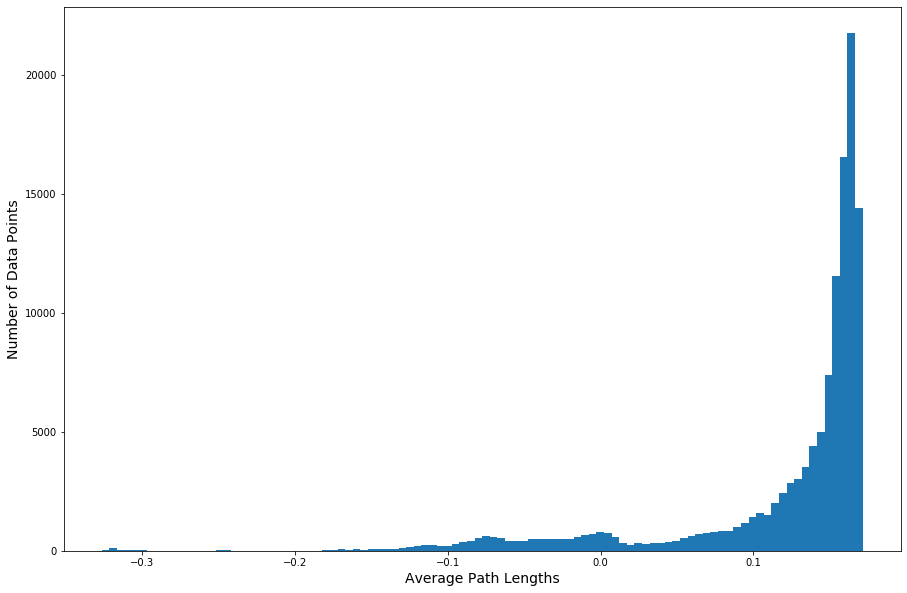

In [15]:
anomaly_scores = isolation_forest.decision_function(x_val)
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores,bins=100)
plt.xlabel('Average Path Lengths',fontsize=14)
plt.ylabel('Number of Data Points',fontsize=14)
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

In [17]:
anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies,matches)
print("AUC: {:.2%}".format (auc))

AUC: 97.54%


Text(0, 0.5, 'Number of Data Points')

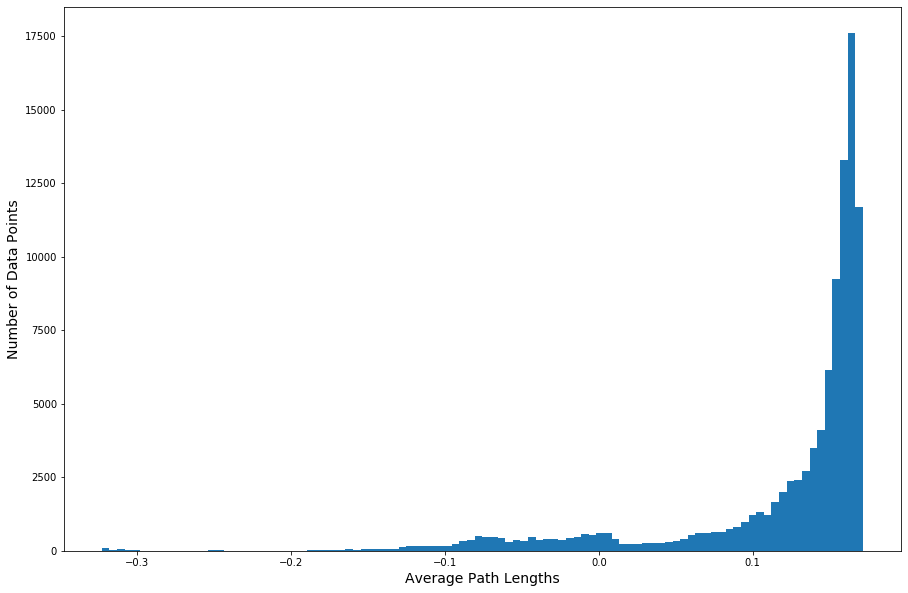

In [18]:
anomaly_scores_test = isolation_forest.decision_function(x_test)
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores_test,bins=100)
plt.xlabel('Average Path Lengths',fontsize=14)
plt.ylabel('Number of Data Points',fontsize=14)

In [19]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies_test,matches)
print("AUC: {:.2%}".format (auc))

AUC: 96.21%


Takeaway: An isolation forest works well for multi-dimensional daa and can be used for unsupersived anomaly detection.

# One-class SVM

In [3]:
from sklearn.svm import OneClassSVM

In [4]:
df = pd.read_csv("C:/Users/timsh/Downloads/kddcup.data/kddcup.data.corrected",sep=",",
                names=columns,index_col=None)

In [5]:
df = df[df["service"] == "http"]
df = df.drop("service",axis=1)
columns.remove("service")

novelties = df[df["label"] != "normal."]

In [6]:
novelties_normal = df[150000:154045]
novelties = pd.concat([novelties,novelties_normal]) #equal mix of anomalies and normal data entries
normal = df[df["label"] == "normal."]

In [7]:
for col in normal.columns:
    if normal[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(normal[col])
        normal[col] = encoded.transform(normal[col])
        
for col in novelties.columns:
    if novelties[col].dtype == "object":
        encoded2=LabelEncoder()
        encoded2.fit(novelties[col])
        novelties[col] = encoded2.transform(novelties[col])

C:\Users\timsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
for _ in range(0,10):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
df2 = pd.concat([normal[:100000], normal[200000:250000]])
df_validate = normal[100000:150000]
x_train,x_test = train_test_split(df2,test_size=0.2,random_state=42)
x_val = df_validate

In [10]:
ocsvm = OneClassSVM(kernel = 'rbf', gamma=0.00005, nu=0.1) # nu specifies the misclassification rate

In [11]:
ocsvm.fit(x_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
            max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

In [12]:
preds = ocsvm.predict(x_test)
score = 0
for i in range(0, x_test.shape[0]):
    if (preds[i] == 1):
        score = score+1

accuracy = score / x_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 89.65%


In [14]:
preds = ocsvm.predict(x_val)
score = 0
for i in range(0, x_val.shape[0]):
    if (preds[i] ==1):
        score = score+1
        
accuracy = score / x_val.shape[0]
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 89.57%


In [16]:
preds = ocsvm.predict(novelties)
matches = novelties["label"] == 4 # true normal instances

auc = roc_auc_score(preds,matches)
print("AUC: {:.2%}".format (auc))

AUC: 95.92%


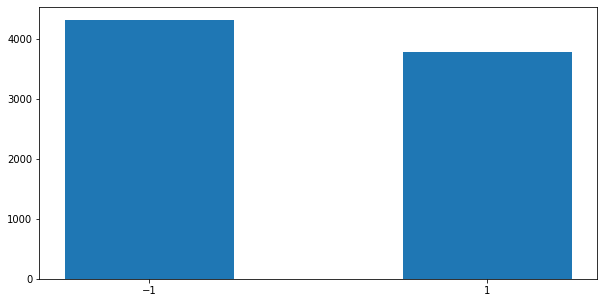

In [17]:
plt.figure(figsize=(10,5))
plt.hist(preds, bins=[-1.5,-0.5]+[0.5,1.5],align='mid')
plt.xticks([-1,1])
plt.show()

Takeaway: OC-SVM works well for multi-dimensional data and can be used for semi-supervised anomaly detection.